In [1]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


In [2]:
df_BMD = pd.DataFrame({'BMD': [4.51, 7.95, 4.97, 3.00, 7.97, 2.23, 3.95, 5.64, 9.35, 6.52, 4.96, 6.10, 7.19,
                           4.03, 2.72, 9.19, 5.17, 5.70, 5.85, 6.45, 5.32, 6.00, 5.12, 7.08, 5.48, 6.52,
                           4.09, 6.28, 7.77, 5.68, 8.47, 4.58, 4.11, 5.72, 5.91, 6.89, 6.99, 4.98, 9.94,
                           6.38, 4.73, 5.81, 5.69, 3.86 ,4.06, 6.56, 8.34, 3.01, 6.71, 6.51, 1.70, 5.89,
                           6.55, 5.34, 5.88, 7.50, 3.28, 5.38, 7.30, 5.46, 7.03, 4.65, 6.65, 5.49, 6.98,
                           4.85, 7.26, 5.92, 5.58, 7.91, 4.90, 4.54, 8.18, 5.42, 6.03, 7.04, 5.17, 7.60,
                           7.90, 7.91],
                   'PEMF_type': np.repeat(['sham','PEMF1h','PEMF2h','PEMF4h'],20)})

In [3]:
df_BMD

,BMD,PEMF_type
0,4.51,sham
1,7.95,sham
2,4.97,sham
3,3.00,sham
4,7.97,sham
...,...,...
75,7.04,PEMF4h
76,5.17,PEMF4h
77,7.60,PEMF4h
78,7.90,PEMF4h


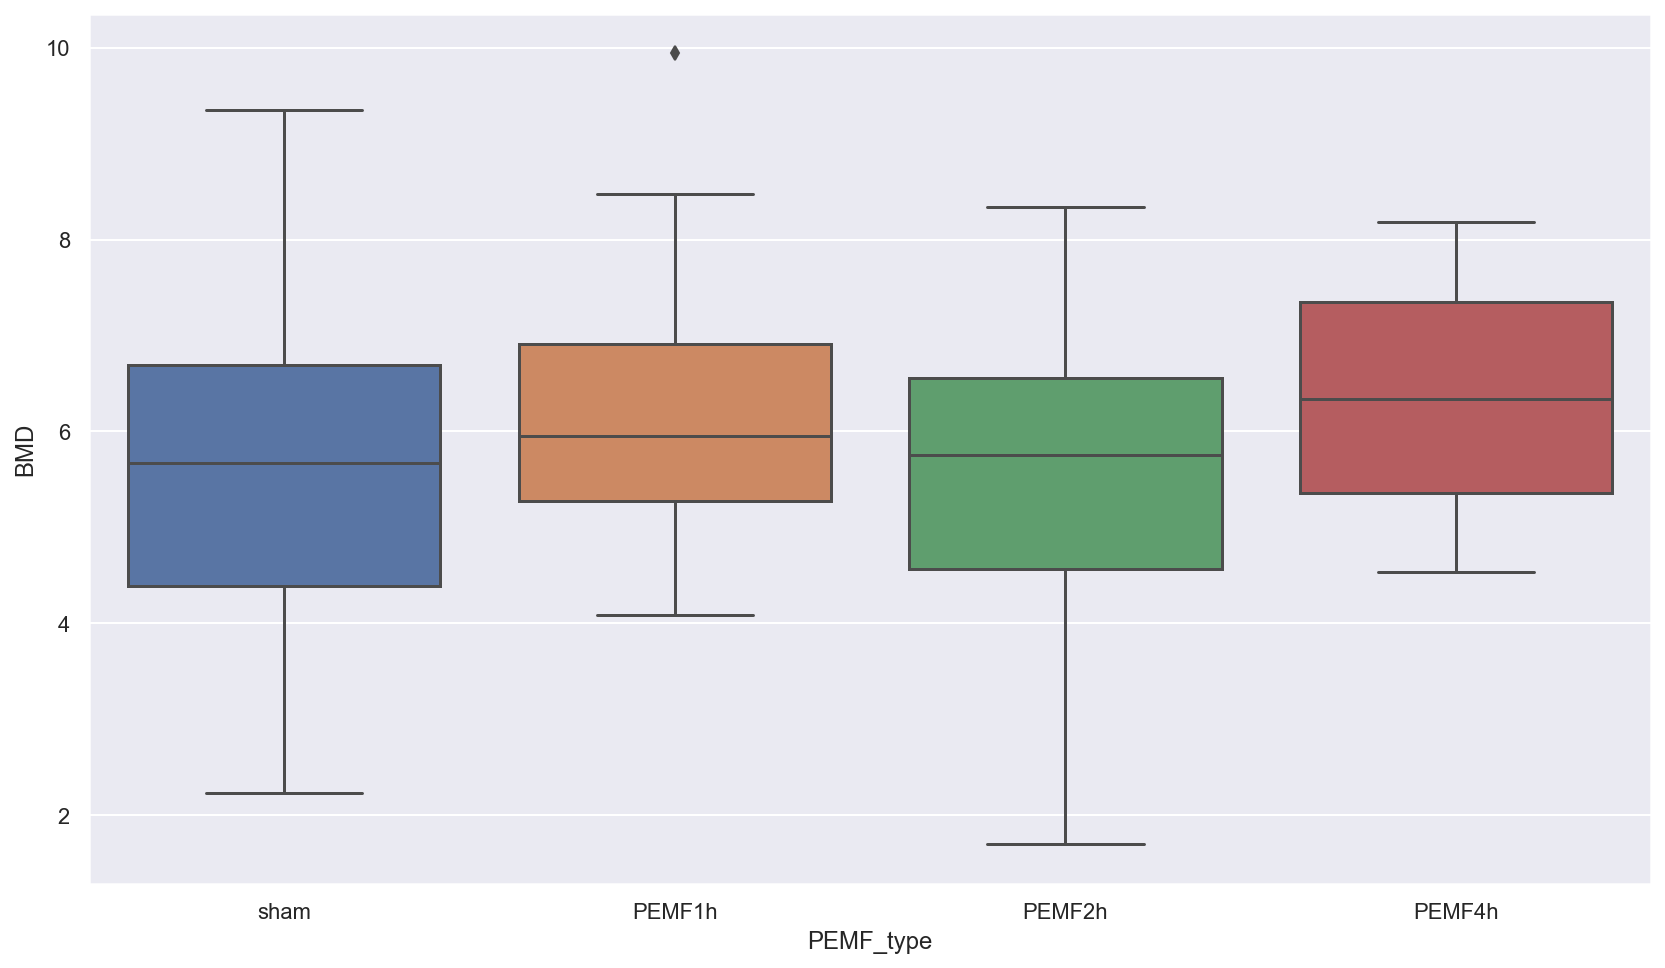

In [4]:
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style("darkgrid")
sns.boxplot(x='PEMF_type',y='BMD',data=df_BMD);

In [5]:
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

BMD_model = ols('BMD ~ PEMF_type', df_BMD).fit()
anova_table = sm.stats.anova_lm(BMD_model)
print(anova_table)

             df      sum_sq   mean_sq         F    PR(>F)
PEMF_type   3.0   10.043504  3.347835  1.297941  0.281326
Residual   76.0  196.030085  2.579343       NaN       NaN


ข้อ 1.2

In [6]:
def check_anova_normality(group, x):

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, color='blue', ax=ax1)
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4)
    ax4.set_title('Normal plot')
    plt.tight_layout()

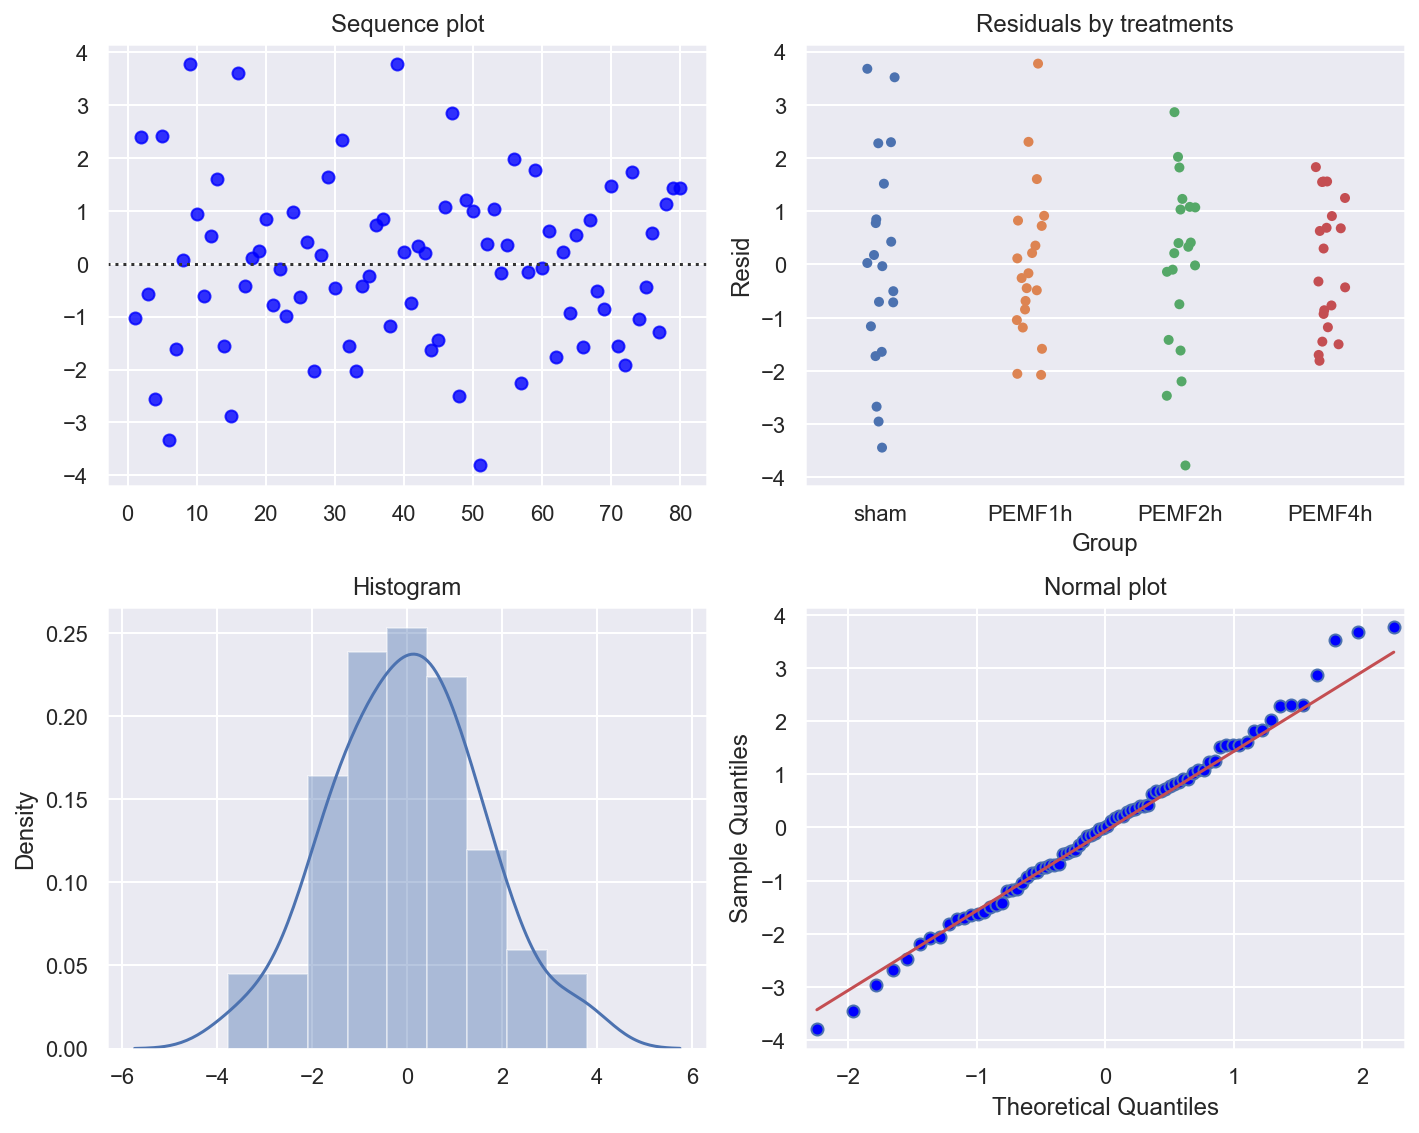

In [7]:
check_anova_normality(df_BMD['PEMF_type'], BMD_model.resid)

In [8]:
Reacttime_df = pd.DataFrame({'Reaction_time': [8,7,1,7,3,11,2,7,3,8,4,9,10,1,5,6,8,6,6,10,4,2,3,8,8],
                              'Ingredient': ['A','B','D','C','E','C','E','A','D','B','B','A','C','E','D','D','C','E','B','A','E','D','B','A','C'],
                              'Bacth': np.repeat(['1','2','3','4','5'],5), 
                              'Day': ['1','2','3','4','5']*5})

In [9]:
Reacttime_df.head()

,Reaction_time,Ingredient,Bacth,Day
0,8,A,1,1
1,7,B,1,2
2,1,D,1,3
3,7,C,1,4
4,3,E,1,5


In [10]:
Reacttime_model = ols('Reaction_time ~ Ingredient + Bacth + Day', Reacttime_df).fit()
anova_table1 = sm.stats.anova_lm(Reacttime_model)
print(anova_table1)

              df  sum_sq    mean_sq          F    PR(>F)
Ingredient   4.0  141.44  35.360000  11.309168  0.000488
Bacth        4.0   15.44   3.860000   1.234542  0.347618
Day          4.0   12.24   3.060000   0.978678  0.455014
Residual    12.0   37.52   3.126667        NaN       NaN


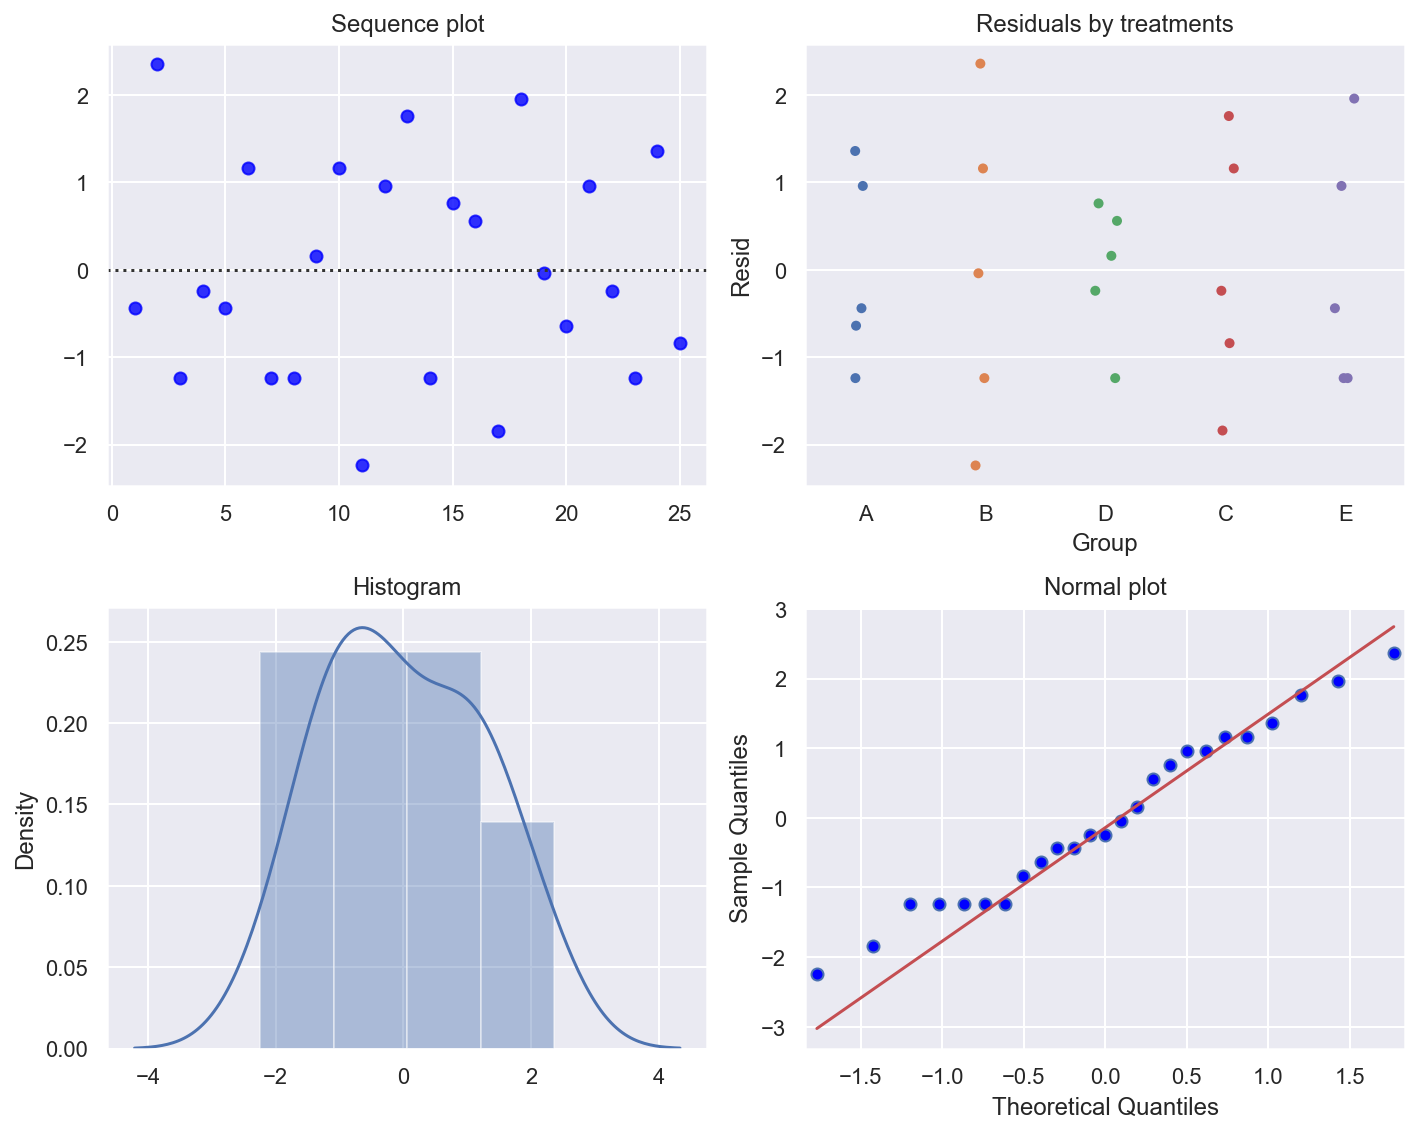

In [11]:
check_anova_normality(Reacttime_df['Ingredient'], Reacttime_model.resid)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1422 -6.2173  0.6173  False
     A      C      0.4    0.9 -3.0173  3.8173  False
     A      D     -5.0 0.0024 -8.4173 -1.5827   True
     A      E     -5.2 0.0016 -8.6173 -1.7827   True
     B      C      3.2 0.0734 -0.2173  6.6173  False
     B      D     -2.2 0.3362 -5.6173  1.2173  False
     B      E     -2.4 0.2579 -5.8173  1.0173  False
     C      D     -5.4 0.0011 -8.8173 -1.9827   True
     C      E     -5.6  0.001 -9.0173 -2.1827   True
     D      E     -0.2    0.9 -3.6173  3.2173  False
----------------------------------------------------


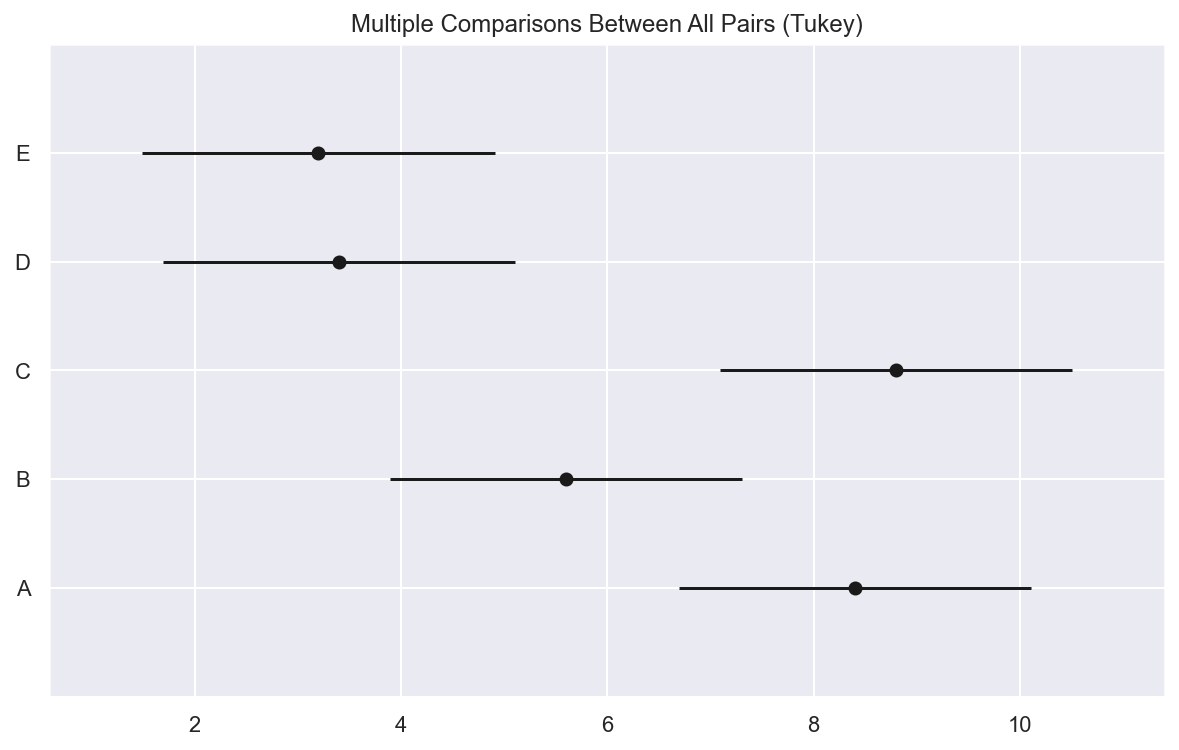

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result = pairwise_tukeyhsd(Reacttime_df['Reaction_time'],Reacttime_df['Ingredient'],alpha=0.05)
print(result)
result.plot_simultaneous();